<a href="https://colab.research.google.com/github/titan-figue/Wordcloud/blob/main/Wordcloud_wikipediaAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Word Cloud

A word cloud is a snapshot of text.

### Install the Word Cloud Library

In a Google Colab notebook we use the next script.

In [1]:
!pip install wordcloud

In a terminal we use 

```pip install wordcloud``` 
or
```conda install -c conda-forge wordcloud```


### Import the Text Material

For this example, we will use content from a Wikipedia page, which you can download as raw text in a few lines of code without the inherent markup.

In [2]:
import requests

def wikipedia_page(title):
  '''
  This function returns the raw text of a wikipedia page
  given a wikipedia page title
  '''
  params = {
      'action': 'query',
      'format': 'json', # request json formatted content
      'titles': title, #title of the wikipedia page
      'prop': 'extracts',
      'explaintext': True
  }
  headers = {"User-Agent": ""}
  # send a request to the wikipedia api
  response = requests.get(
      'https://en.wikipedia.org/w/api.php',  
      params= params, headers = headers
  ).json()

  #Parse the result and extract the text
  page = next(iter(response['query']['pages'].values()))
  # return the page content
  if 'extract' in page.keys():
    return page['extract']
  else:
    return "Page not found"

# we lowercase the text to avoid having to deal with uppercase and capitalized words
text = wikipedia_page('Carbon capture and storage').lower()
print(text)

carbon capture and storage (ccs) or carbon capture and sequestration is the process of capturing carbon dioxide (co2) before it enters the atmosphere, transporting it, and storing it (carbon sequestration) for centuries or millennia. usually the co2 is captured from large point sources, such as coal-fired power plant, a chemical plant or biomass power plant, and then stored in an underground geological formation. the aim is to prevent the release of co2 from heavy industry with the intent of mitigating the effects of climate change. although co2 has been injected into geological formations for several decades for various purposes, including enhanced oil recovery, the long-term storage of co2 is a relatively new concept. carbon capture and utilization (ccu) and ccs are sometimes discussed collectively as carbon capture, utilization, and sequestration (ccus). this is because ccs is a relatively expensive process yielding a product with an intrinsic low value (i.e. co2). hence, carbon cap

## Create the Word Cloud

In [3]:
# import the wordcloud library
from wordcloud import WordCloud
#Instantiate a new wordcloud.
wordcloud = WordCloud(random_state = 8,
                      normalize_plurals = False,
                      width = 600, height=300,
                      max_words = 300,
                      stopwords = []
                       )
# Apply the wordcloud to the text.
wordcloud.generate(text)

Use ```matplotlib``` to display the word cloud as an image:

(-0.5, 599.5, 299.5, -0.5)

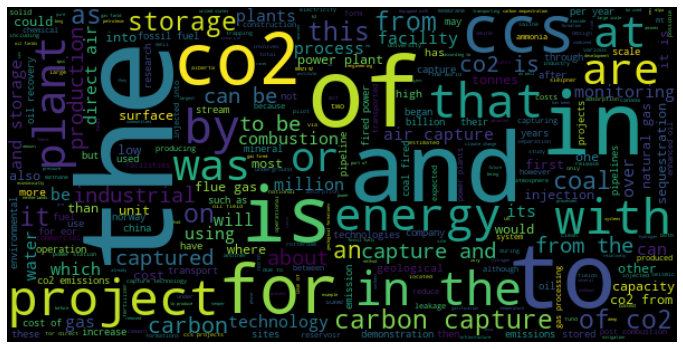

In [4]:
import matplotlib.pyplot as plt
# create a figure
fig, ax = plt.subplots(1,1, figsize = (12,9))
#add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
#and remove the axis
plt.axis("off")


# Remove Stop Words

*Stop words* are words (prepositions, conjunctions, etc).


### Count Word Frequencies



In [5]:
print (text[:200] + '...')

carbon capture and storage (ccs) or carbon capture and sequestration is the process of capturing carbon dioxide (co2) before it enters the atmosphere, transporting it, and storing it (carbon sequestra...


* The first step is to create a list of the most 
frequent words by splitting the text over the whitespace character ' ' with the function ``` text.split(' ')```.

* Then, count how many times each word appears in the text using the ```Counter```. function. 


In [6]:
from collections import Counter
# we transform the text into a list of words
# by splitting over the space character ' '
word_list = text.split(' ')
#and count the wors
words_counts = Counter(word_list)

```word_counts```is a dictionary whose keys are all the text's different words and whose values are the number of times each word is presented in the text.

``` word_counts.most_common(20)``` is the list of 20 most common words.

In [8]:
for  w in words_counts.most_common(20):
  print(f"{w[0]}: \t{w[1]} ")

the: 	466 
of: 	247 
and: 	230 
to: 	205 
in: 	191 
co2: 	177 
a: 	168 
is: 	159 
for: 	110 
capture: 	92 
from: 	73 
ccs: 	69 
carbon: 	66 
be: 	66 
with: 	59 
as: 	54 
that: 	54 
by: 	52 
gas: 	51 
project: 	50 


Zipf's law

### Remove Stop Words

In [13]:
# transform the text into list of words
words_list = text.split(' ')
# define the list of words you want to remove from the text
stopwords = ['the', 'of', 'and', 'is', 'to', 'in', 'a', 'from', 'by', 
             'that', 'with', 'this', 'as', 'an', 'are', 'it', 'or', 'on', 'at', 'for']
# use a python list comprehension to remove the stopwords from words_list
words_without_stopwords = [ word for word in words_list if word not in stopwords]



The list of the top 20 most frequent words is:

In [14]:
Counter(words_without_stopwords).most_common(20)

[('co2', 177),
 ('capture', 92),
 ('ccs', 69),
 ('carbon', 66),
 ('be', 66),
 ('gas', 51),
 ('project', 50),
 ('plant', 49),
 ('power', 46),
 ('was', 44),
 ('storage', 43),
 ('energy', 40),
 ('can', 38),
 ('oil', 37),
 ('—', 27),
 ('air', 25),
 ('coal', 23),
 ('captured', 22),
 ('into', 22),
 ('technology', 21)]

In [18]:
print (list(WordCloud().stopwords)[:20])

['during', 'has', 'for', "they'd", 'their', "we're", "haven't", 'me', "shouldn't", 'an', 'here', 'above', 'yourselves', "here's", 'no', 'have', "she'll", 'whom', 'with', 'my']


### Generating a word cloud for items in a list

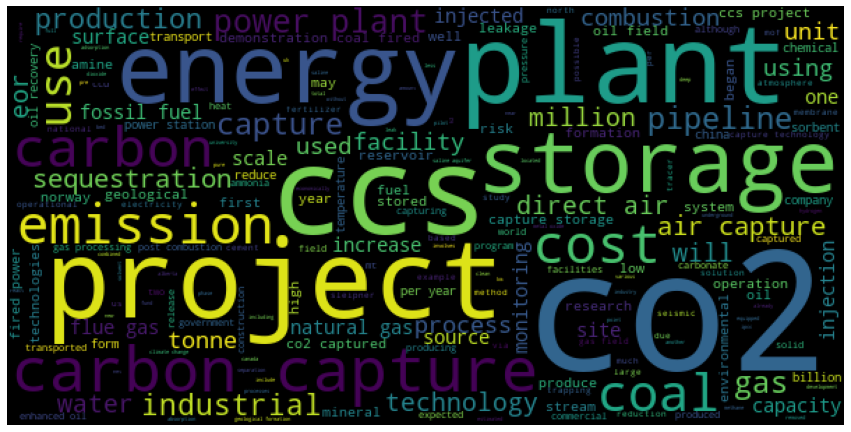

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(" ").join(words_without_stopwords)
wordcloud = WordCloud(width = 600, height = 300).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off") #and remove the axis
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

Another way by creating a counter dictionary

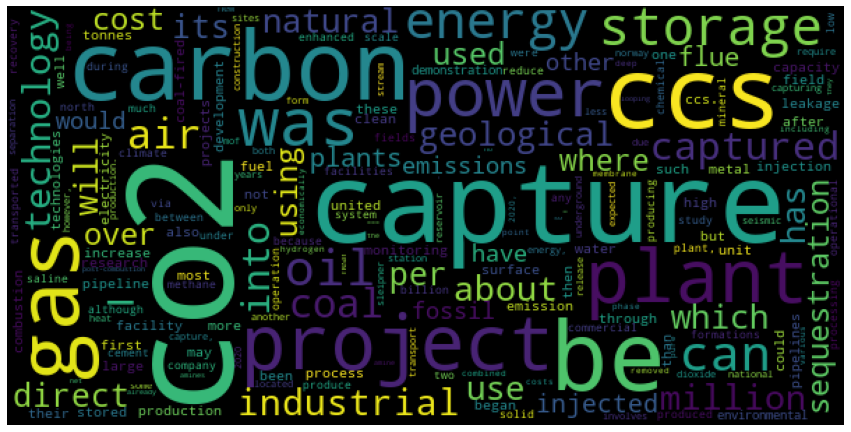

In [24]:
#convert it to dictionary with values and its occurences
from collections import Counter
word_could_dict=Counter(words_without_stopwords)
wordcloud = WordCloud(width = 600, height = 300).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.savefig('yourfile.png', bbox_inches='tight')
plt.close()

## Gutenberg project


In [27]:
import requests

# this is the url for Flatland, by Edwin A. Abbott
flatland_url = 'https://www.gutenberg.org/cache/epub/201/pg201.txt'
result = requests.get(flatland_url)

print(result.text)


﻿The Project Gutenberg EBook of Flatland: A Romance of Many Dimensions
(Illustrated), by Edwin A. Abbot

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Flatland: A Romance of Many Dimensions (Illustrated)

Author: Edwin A. Abbot

Release Date: March 10, 2008 [EBook #201]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK FLATLAND ***












Flatland:  A Romance of Many Dimensions

Edwin A. Abbott (1838-1926.  English scholar, theologian, and writer.)



  -----------------------------------------------------------------
  |        "O day and night, but this is wondrous strange"        |
  |        ______                                                 |
  |       /       /     /|   ------  /     /|      /|    /  /-.   |
  |     /----   /     /__|    /    /     /

(-0.5, 799.5, 399.5, -0.5)

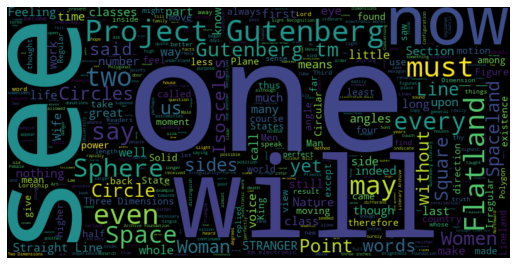

In [28]:
text = result.text
#Wordcloud
wordcloud = WordCloud( 
    random_state = 8,
    normalize_plurals = False,
    width = 800,
    height= 400,
    max_words = 400)
wordcloud.generate(text)
# plot
fig, ax = plt.subplots(1, 1, figsize = (9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")